# Sklearn (Версия Python 3) 

## sklearn.linear_model

In [43]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics

import numpy as np

In [44]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Линейная регрессия 

### Генерация данных 

In [45]:
data, target, coef = datasets.make_regression(n_features=2, n_informative=1, n_targets=1, noise=5, coef=True, random_state=2)

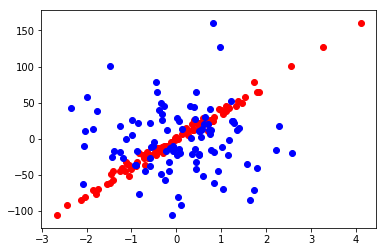

In [46]:
pylab.scatter(list(map(lambda x: x[0], data)), target, color='r')
pylab.scatter(list(map(lambda x: x[1], data)), target, color='b')

Из графика хорошо видно, что информативным признаком является красный признак, поскольку имеет намного большую корреляцию с целевой переменной

In [47]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data, target, test_size=0.3)

### LinearRegression 

In [48]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [49]:
print(test_labels)

[  44.41658249  -40.84204295  -80.80239408  -48.28700118    1.72644759
  -12.0017312  -105.77758163   64.70214251   21.20540389   51.87072011
   78.24817537  -19.36956003    4.45578287  -35.32062686  -76.75213382
  -42.44469577  -91.477377     22.2276832   -18.57607726  -16.65927231
  -22.32195021   13.31981235    0.34799656   12.47089016  -57.46293828
  -13.99339669   10.33267887   22.13032804   49.41686419   41.1068411 ]


In [50]:
print(predictions)

[  43.37969793  -47.82653839  -78.95805213  -56.48922072   -1.02624532
   -8.07532719 -102.60718507   67.57497436   15.47172938   51.1635331
   65.63595227  -32.67216462    8.92314709  -43.11680818  -69.43885198
  -40.05322053  -94.03938537   18.2840419   -26.02109711  -14.82304927
  -23.77618128   13.56548835   -2.51858294   18.99306029  -55.17673867
  -15.56284627    8.20506963   19.68247968   55.14843479   35.67271263]


In [51]:
metrics.mean_absolute_error(test_labels, predictions)

4.386220459748686

In [52]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring='neg_mean_absolute_error', cv=10)
print('mean: {:.3f}, std: {:.3f}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070, std: 1.074


In [53]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=True)

In [54]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring=scorer, cv=10)
print('mean: {:.3f}, std: {:.3f}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070, std: 1.074


Коэффициенты аппроксимации исходной функции

In [55]:
coef

array([38.07925837,  0.        ])

In [56]:
print('y = {:.2f}*x1 + {:.2f}*x2'.format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


Найденные коэффициенты аппроксимации

In [57]:
linear_regressor.coef_

array([38.21850624, -0.09406511])

In [58]:
print('y = {:.2f}*x1 + {:.2f}*x2'.format(linear_regressor.coef_[0], linear_regressor.coef_[1]))

y = 38.22*x1 + -0.09*x2


## Lasso-регрессия 

In [59]:
lasso_regressor = linear_model.Lasso()
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [60]:
lasso_scoring = cross_validation.cross_val_score(lasso_regressor, data, target, scoring=scorer, cv=10)
print('mean: {:.3f}, std: {:.3f}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.154, std: 1.017


In [61]:
print('y = {:.2f}*x1 + {:.2f}*x2'.format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [62]:
print('y = {:.2f}*x1 + {:.2f}*x2'.format(lasso_regressor.coef_[0], lasso_regressor.coef_[1]))

y = 37.39*x1 + -0.00*x2


Отсюда видно, что Lasso-регрессия позволяет проводить отбор признаков. Она не просто штрафует их маленькими значениями весов, а исключает из модели в целом